In [42]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import infercnvpy as cnv
import anndata as an
import gseapy as gp
import scanpy as sc

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


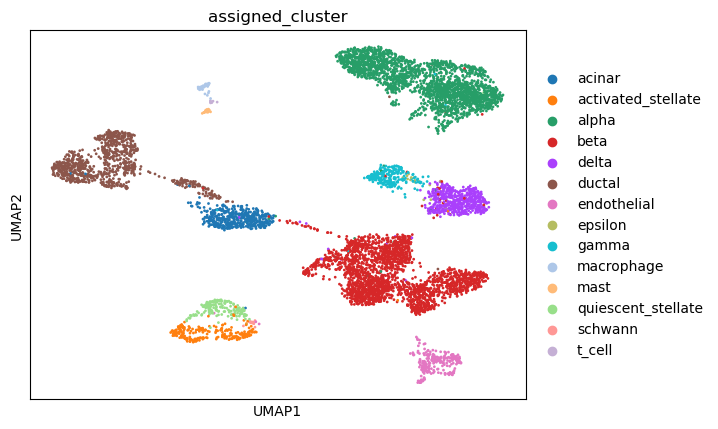

In [35]:
pdata = sc.read_h5ad('../mhCompTiss/write/pancreasHuman.h5ad')
sc.pl.umap(pdata, color=["assigned_cluster"])

In [38]:
pdata = pdata.raw.to_adata()

In [2]:
writeDir = "write/"

fileName = "pdacPdxMrtx"

resultsFile = writeDir + fileName + '.h5ad'       # final output
resultsFileTotal = writeDir + fileName + 'wImm.h5ad'       # final output
resultsFileQC = writeDir + fileName + '_QC.h5ad'  # post QC (pre-analysis) 

In [3]:
adata = sc.read_h5ad(resultsFile)
adata

AnnData object with n_obs × n_vars = 5097 × 2098
    obs: 'MRTX1_B0251', 'MRTX2_B0252', 'MRTX3_B0253', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'GMM', 'Vehicle1_B0254', 'Vehicle2_B0255', 'Vehicle3_B0256', 'treatment', 'S_score', 'G2M_score', 'phase', 'leiden', 'tumor', 'scBasalScore', 'scClassicalScore', 'EMTScore', 'cellState', 'decoupler', 'zsig'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mt'
    uns: 'GMM_colors', 'cellState_colors', 'decoupler_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'phase

In [4]:
adata.uns["cellState_colors"]

array(['#1f77b4', '#ff7f0e', '#279e68', '#d62728'], dtype=object)

In [5]:
mrtxVehCmap = {"veh":'#ff7f0e',"mrtx":'#1f77b4'}

cellStateColDict = {"EMT":'#1f77b4', "basal":'#ff7f0e', "classical":'#279e68', "inter":'#d62728'}
cellStateCols = [cellStateColDict[cs] for cs in adata.obs.cellState]

/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/jor4008/programs/miniconda3/envs/scsarc/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_

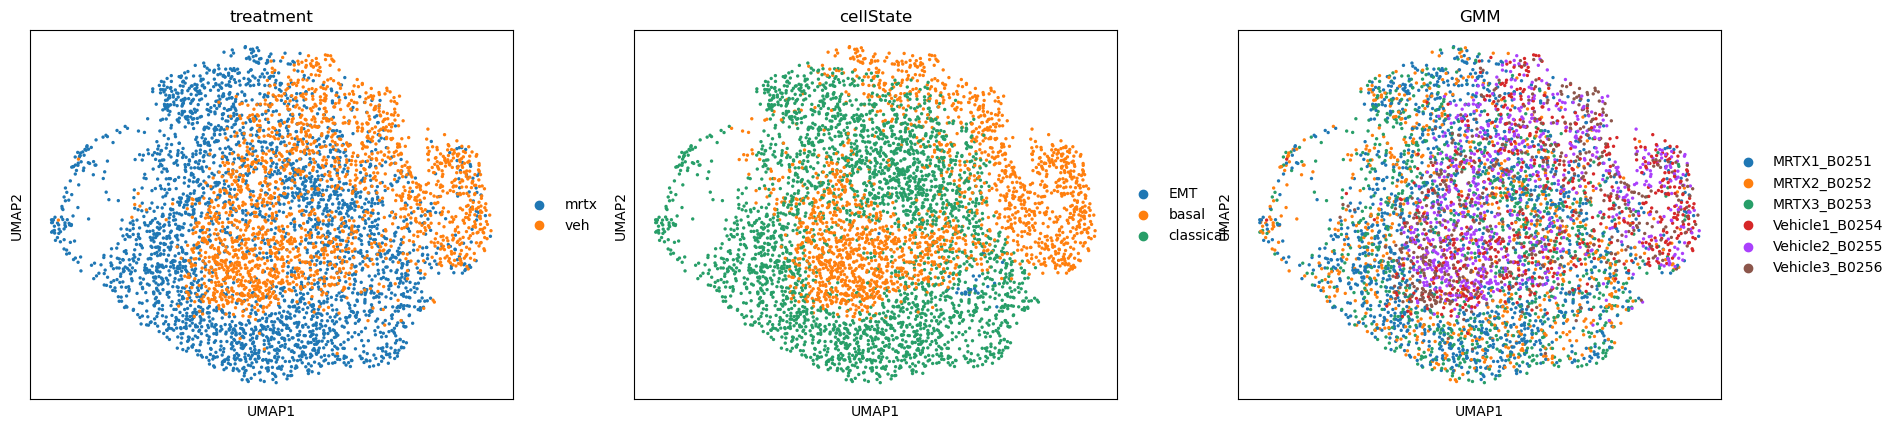

In [6]:
sc.pl.umap(adata, color=["treatment","cellState","GMM"])

In [7]:
cellstate = adata.obs.cellState

In [15]:
adata = sc.read_h5ad(resultsFileQC)
adata = adata[cellstate.index]
adata

View of AnnData object with n_obs × n_vars = 5097 × 22236
    obs: 'MRTX1_B0251', 'MRTX2_B0252', 'MRTX3_B0253', 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mm', 'pct_counts_mm', 'total_counts_mt', 'pct_counts_mt', 'most_likely_hypothesis', 'cluster_feature', 'negative_hypothesis_probability', 'singlet_hypothesis_probability', 'doublet_hypothesis_probability', 'Classification', 'GMM', 'Vehicle1_B0254', 'Vehicle2_B0255', 'Vehicle3_B0256', 'treatment'

In [16]:
adata.obs["cellState"] = cellstate
adata.obs

/tmp/ipykernel_3503176/2281070606.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs["cellState"] = cellstate


,MRTX1_B0251,MRTX2_B0252,MRTX3_B0253,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,...,negative_hypothesis_probability,singlet_hypothesis_probability,doublet_hypothesis_probability,Classification,GMM,Vehicle1_B0254,Vehicle2_B0255,Vehicle3_B0256,treatment,cellState
AAACCCAGTACAGCGA-1-mrtx,2930.0,31.0,19.0,4347,4320,12858.0,24.540876,33.188687,41.929485,54.567997,...,5.349299e-17,0.999052,0.000948,MRTX1_B0251,MRTX1_B0251,NaN,NaN,NaN,mrtx,basal
AAACCCAGTTCCTTGC-1-mrtx,1281.0,11.0,19.0,4785,4751,14625.0,20.476418,26.783155,34.919118,49.273087,...,1.122869e-11,0.999385,0.000615,MRTX1_B0251,MRTX1_B0251,NaN,NaN,NaN,mrtx,basal
AAACGAACACTGAATC-1-mrtx,79.0,86.0,43.0,830,826,1117.0,20.535714,29.821429,43.928571,70.714286,...,9.075563e-02,0.876582,0.032662,MRTX2_B0252,MRTX2_B0252,NaN,NaN,NaN,mrtx,classical
AAACGAACAGGATGAC-1-mrtx,1499.0,13.0,18.0,5905,5883,22477.0,21.316210,27.897263,36.300213,49.568966,...,2.465464e-12,0.999504,0.000496,MRTX1_B0251,MRTX1_B0251,NaN,NaN,NaN,mrtx,basal
AAACGCTAGTAGAGTT-1-mrtx,352.0,8.0,8.0,3979,3939,11856.0,28.390293,36.711731,45.688135,58.107314,...,7.189104e-07,0.999970,0.000030,MRTX1_B0251,MRTX1_B0251,NaN,NaN,NaN,mrtx,basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTAGAGAACCC-1-veh,NaN,NaN,NaN,5046,5011,16319.0,20.004875,26.598014,34.799829,48.632015,...,1.124192e-07,0.999991,0.000009,Vehicle3_B0256,Vehicle3_B0256,19.0,26.0,1176.0,veh,basal
TTTGGTTCATCCTAAG-1-veh,NaN,NaN,NaN,4896,4865,15075.0,16.396801,24.063182,33.262838,47.749653,...,2.228625e-16,0.999982,0.000018,Vehicle2_B0255,Vehicle2_B0255,20.0,3659.0,9.0,veh,classical
TTTGGTTGTGTACATC-1-veh,NaN,NaN,NaN,2593,2547,7451.0,30.309882,40.218114,50.738130,65.753425,...,4.537960e-04,0.999502,0.000044,Vehicle3_B0256,Vehicle3_B0256,27.0,38.0,319.0,veh,basal
TTTGGTTTCGTAGAGG-1-veh,NaN,NaN,NaN,6661,6611,31000.0,17.357580,26.353396,36.565819,50.672675,...,1.308902e-16,0.999960,0.000040,Vehicle2_B0255,Vehicle2_B0255,26.0,3877.0,21.0,veh,basal


In [65]:
pdata.obs["cellState"] = pdata.obs["assigned_cluster"]
pdata.obs["treatment"] = ["None"]*len(pdata.obs)
pdata.obs

,Unnamed: 0,assigned_cluster,batch,lib,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,pct_counts_mt,leiden,cellState,treatment
barcode,,,,,,,,,,,,,,,,
AAAATCGTT-GGAAACAG,human1_lib1.final_cell_0013,delta,h1,lib1,2357,2354,8331.0,48.937703,54.363222,61.025087,72.620334,0.0,0.0,3,delta,None
GATTGAGGGT-CTGGTGCA,human1_lib1.final_cell_0014,delta,h1,lib1,2191,2189,8153.0,51.416656,57.267264,64.234024,75.211579,0.0,0.0,3,delta,None
AAATCGGGT-GAGAGTAT,human1_lib1.final_cell_0020,beta,h1,lib1,2463,2461,8555.0,40.280538,47.586207,56.294565,69.433080,0.0,0.0,0,beta,None
AAAAGTCGG-GGCGTTAG,human1_lib1.final_cell_0022,alpha,h1,lib1,2729,2727,7259.0,27.276484,34.550214,43.532167,58.823529,0.0,0.0,1,alpha,None
CGCTAATA-AATGTTTG,human1_lib1.final_cell_0025,delta,h1,lib1,2550,2545,9146.0,46.260660,52.383556,59.752897,71.506670,0.0,0.0,3,delta,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAGATCTCGG-GTCTCTCT,human4_lib3.final_cell_0697,activated_stellate,h4,lib3,1055,1051,2090.0,29.377990,40.526316,52.775120,73.636364,0.0,0.0,7,activated_stellate,None
GCTTACCT-ATGTTGGC,human4_lib3.final_cell_0698,alpha,h4,lib3,1007,1006,2012.0,38.170974,46.371769,56.312127,74.850895,0.0,0.0,2,alpha,None
TGACACAGTTT-TTGTCGCC,human4_lib3.final_cell_0699,beta,h4,lib3,942,941,2194.0,46.308113,53.737466,63.126709,79.899727,0.0,0.0,5,beta,None


In [77]:
pdata.obs.assigned_cluster.cat.categories

Index(['acinar', 'activated_stellate', 'alpha', 'beta', 'delta', 'ductal',
       'endothelial', 'epsilon', 'gamma', 'macrophage', 'mast',
       'quiescent_stellate', 'schwann', 't_cell'],
      dtype='object')

In [66]:
apdata = an.concat([adata,pdata], label="tumor", keys=["tumor","normal"])

In [67]:
huGeLoc = pd.read_table("data/humanGenePos.tsv", header=None, index_col=0, names=["gene", "chromosome", "start", "end"])

In [68]:
overGenes = list(set(apdata.var_names).intersection(set(huGeLoc.index)))
len(overGenes)

12900

In [69]:
apdata[:,overGenes]

View of AnnData object with n_obs × n_vars = 12763 × 12900
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'treatment', 'cellState', 'tumor'

In [70]:
apdata = apdata[:,overGenes]
apdata.var = apdata.var.join(huGeLoc)

In [71]:
apdata.var

,chromosome,start,end
BCL2L2-PABPN1,chr14,23306835,23325369
GNB2,chr7,100673531,100679174
FHOD1,chr16,67229387,67247658
KHDC1,chr6,73241314,73310365
CALM2,chr2,47160082,47176601
...,...,...,...
VAMP8,chr2,85561562,85582031
GCNT1,chr9,76419850,76507416
CNN3,chr1,94896949,94927278
C9orf64,chr9,83938311,83956986


In [79]:
cnv.tl.infercnv(
    apdata,
    #reference_key="tumor",
    #reference_cat=["normal"],

    reference_key="cellState",
    reference_cat=['acinar', 'activated_stellate', 'alpha', 'beta', 'delta', 'ductal',
       'endothelial', 'epsilon', 'gamma', 'macrophage', 'mast',
       'quiescent_stellate', 'schwann', 't_cell'],

    
    window_size=250,
)

  0%|          | 0/3 [00:00<?, ?it/s]

... storing 'treatment' as categorical


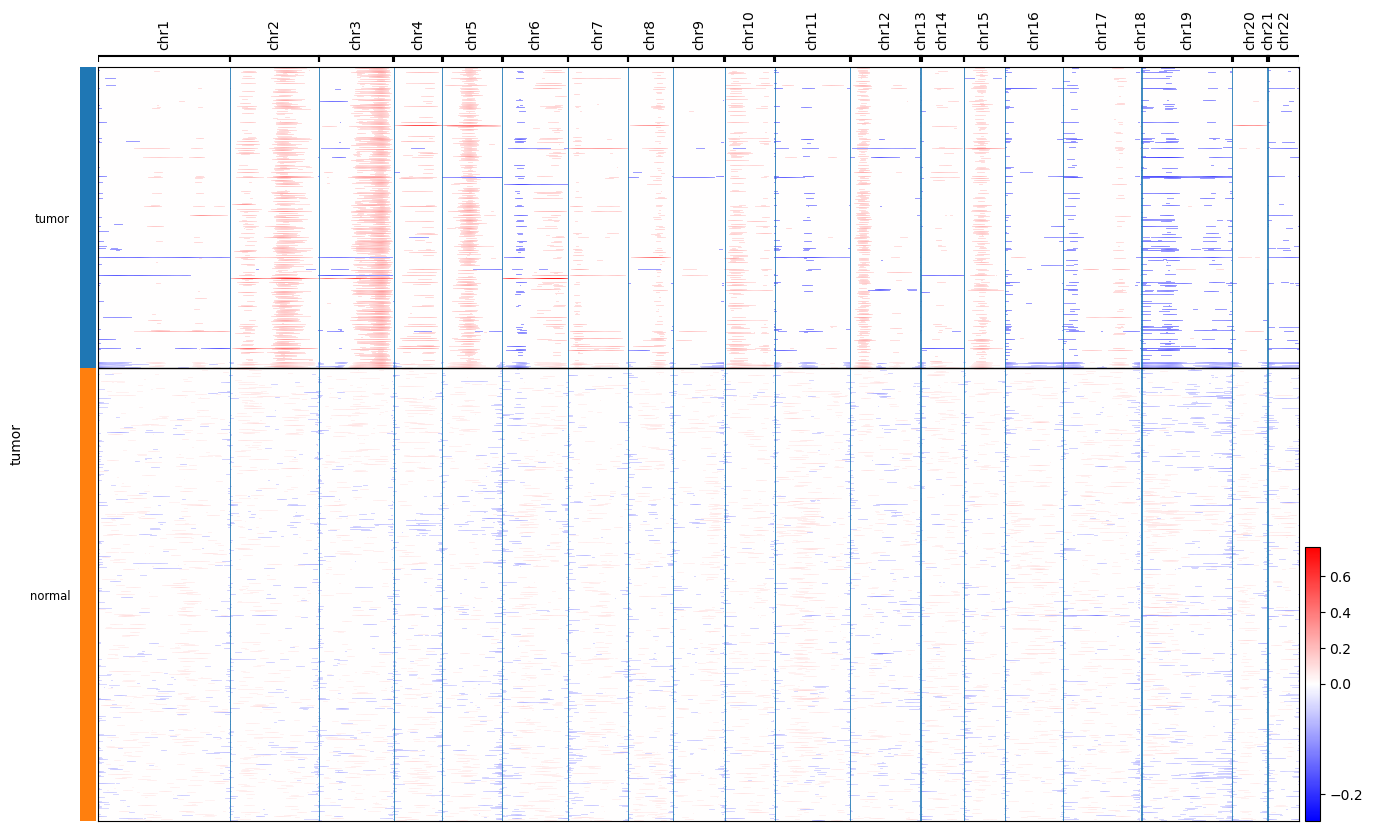

In [80]:
cnv.pl.chromosome_heatmap(apdata, groupby="tumor")

In [95]:
apdata.obs

,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,pct_counts_mt,treatment,cellState,tumor
AAACCCAGTACAGCGA-1-mrtx,4347,4320,12858.0,24.540876,33.188687,41.929485,54.567997,1263.0,9.822679,mrtx,basal,tumor
AAACCCAGTTCCTTGC-1-mrtx,4785,4751,14625.0,20.476418,26.783155,34.919118,49.273087,1502.0,10.270085,mrtx,basal,tumor
AAACGAACACTGAATC-1-mrtx,830,826,1117.0,20.535714,29.821429,43.928571,70.714286,38.0,3.401970,mrtx,classical,tumor
AAACGAACAGGATGAC-1-mrtx,5905,5883,22477.0,21.316210,27.897263,36.300213,49.568966,2312.0,10.286071,mrtx,basal,tumor
AAACGCTAGTAGAGTT-1-mrtx,3979,3939,11856.0,28.390293,36.711731,45.688135,58.107314,1630.0,13.748314,mrtx,basal,tumor
...,...,...,...,...,...,...,...,...,...,...,...,...
GAGATCTCGG-GTCTCTCT,1055,1051,2090.0,29.377990,40.526316,52.775120,73.636364,0.0,0.000000,None,activated_stellate,normal
GCTTACCT-ATGTTGGC,1007,1006,2012.0,38.170974,46.371769,56.312127,74.850895,0.0,0.000000,None,alpha,normal
TGACACAGTTT-TTGTCGCC,942,941,2194.0,46.308113,53.737466,63.126709,79.899727,0.0,0.000000,None,beta,normal
GACGACTCCT-CGCTAATA,1031,1029,2149.0,36.993951,45.974872,57.003257,75.383899,0.0,0.000000,None,beta,normal


In [106]:
apdata.obs["cs-tumor"] = [f"{apdata.obs.iloc[i,10]}-{apdata.obs.iloc[i,9]}" if apdata.obs.iloc[i,11]=="tumor" else "Normal" for i in range(len(apdata.obs))]

... storing 'treatment' as categorical
... storing 'cs-tumor' as categorical


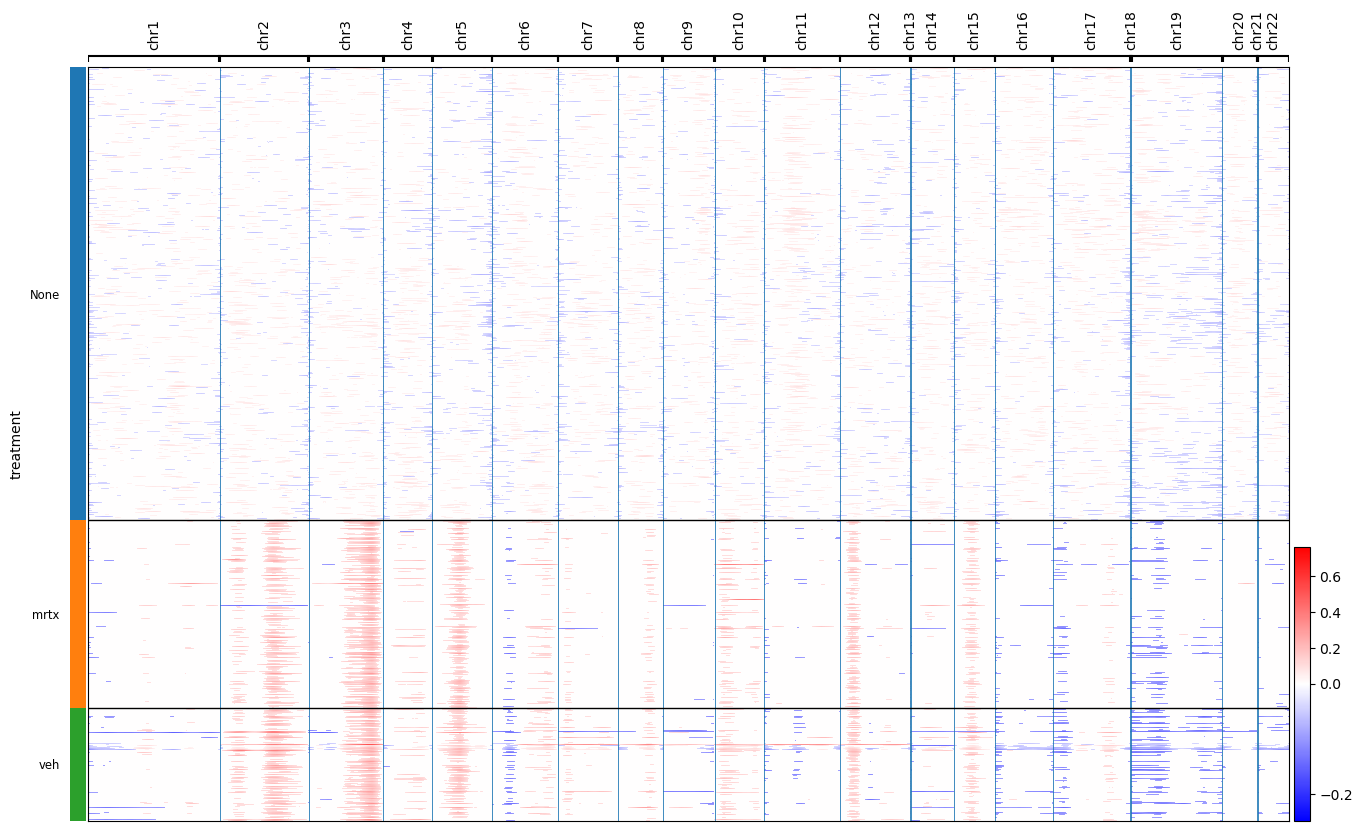

In [109]:
cnv.pl.chromosome_heatmap(apdata, groupby="treatment",save="figures/PDX1InferCnvVehMrtx.svg")

... storing 'treatment' as categorical
... storing 'cs-tumor' as categorical


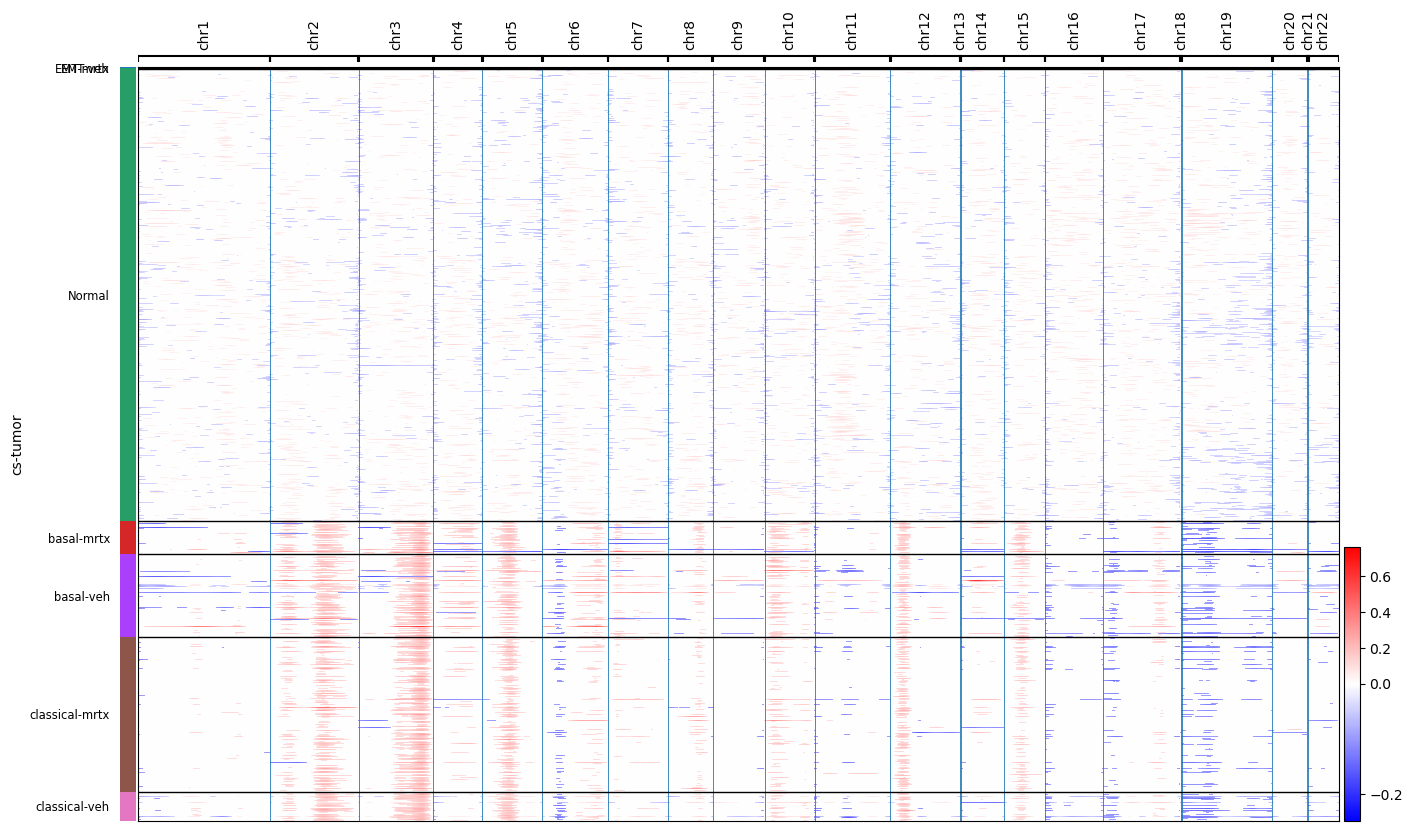

In [108]:
cnv.pl.chromosome_heatmap(apdata, groupby="cs-tumor",save="figures/PDX1InferCnvCellState.svg")

... storing 'treatment' as categorical


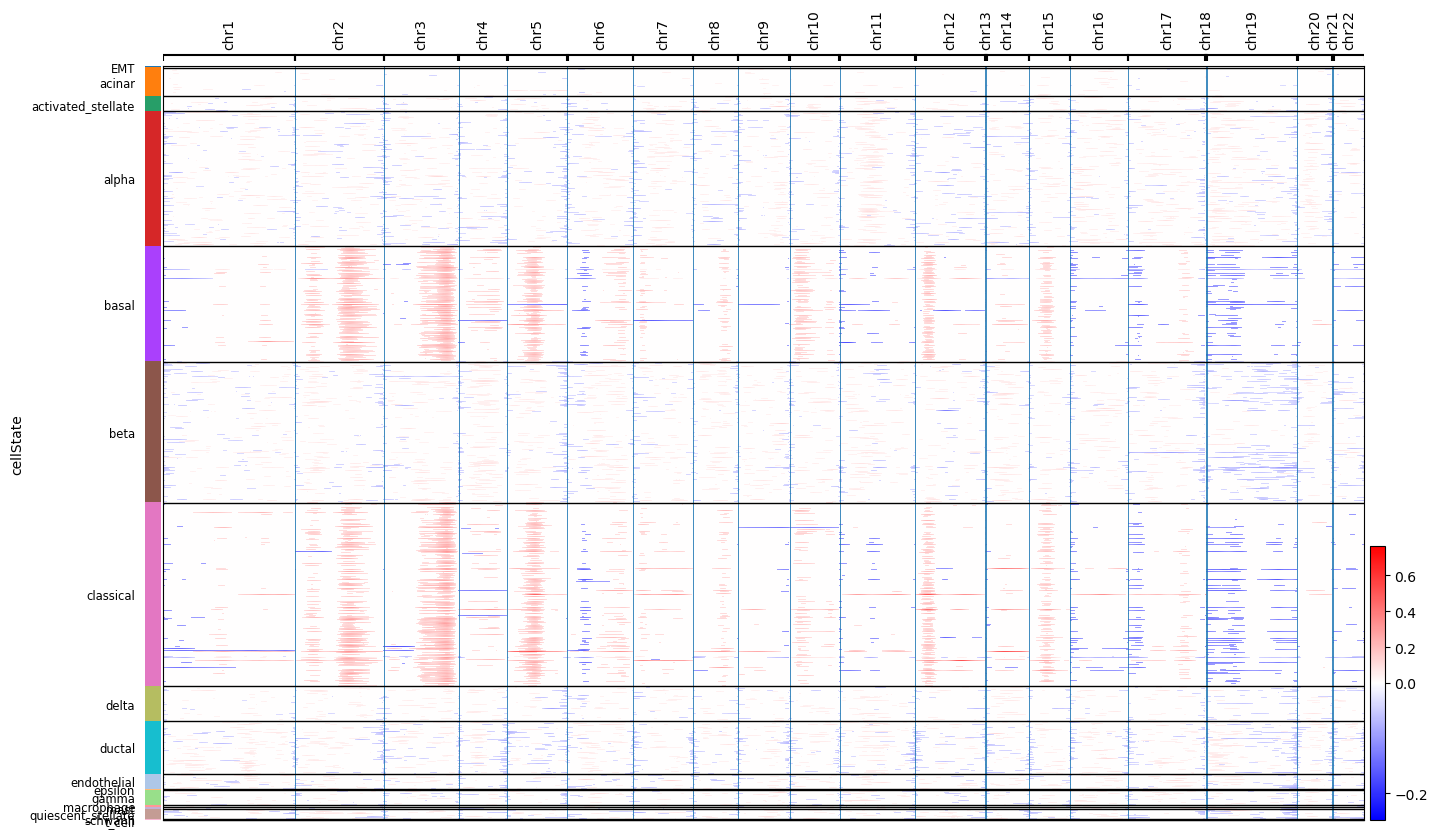

In [82]:
cnv.pl.chromosome_heatmap(apdata, groupby="cellState")